# Lesson 03: "Unpacking" and Loops

# 1. List "Unpacking"

A kind of shortcut for splitting up items in a list in Python is called, "unpacking". You have seen this already in the tutorials for the sympy Beam module which look like this:

```python
E, I = symbols("E I")
```
Here is another example:
```python
R1, R2 = symbols("R1 R2")
```

### What is happening here?

The sympy `symbols` function takes a string of symbols separated by commas, spaces, or commas and spaces and return the symbol objects as items in a list. In the cases above, lists with two items each. Using "unpacking" we can assign each item in the list to its own variable in just one line.

More examples:
```python
my_list = ["column", "beam", "arch"]
item_1, item_2, item_3 = my_list
```

This is less to type than this:
```python
my_list = ["column", "beam", "arch"]
item_1 = my_list[0]
item_2 = my_list[1]
item_3 = my_list[2]
```

Try running the above `my_list` example and try printing out `item_1`, `item_2`, `item_3` to verify for yourself how it works.

## Unpacking into a function call

Some functions accept multiple individual arguments, e.g. 

```python
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

my_beam = Beam(72, 2.2e6, 450) # Three separate arguments
```

But, what if we had these arguments in a list?

```python
L_E_I = [72, 2.2e6, 450]
my_beam = Beam(L_E_I) # This does not work
```

In this case, `Beam` expects to receive three separate values. Passing it a list is passing only one single value, a list, of a type it is not expecting.

Using unpacking, we can do this:

```python
L_E_I = [72, 2.2e6, 450]
my_beam = Beam(*L_E_I) # This will unpack the list items into each positional argument
```

This also works:

```python
reactions = symbols("R1 R2") # This returns a list of two symbols, R1 and R2
my_beam.solve_for_reaction_loads(*reactions)
```

Note, that `Beam` requires exactly three arguments, `L`, `E`, and `I` so the list you unpack must have exactly three items.

However, `my_beam.solve_for_reaction_loads()` can take any number of arguments so you can unpack a list of any length.

**Caution**
If you try to unpack a list, you _must_ have the **exact** number of items in the list as there are variables to unpack to. Otherwise, you will get a `ValueError`:

```python
my_list = ["column", "beam", "arch"]
item_1, item_2, item_3, item_4 = my_list
```
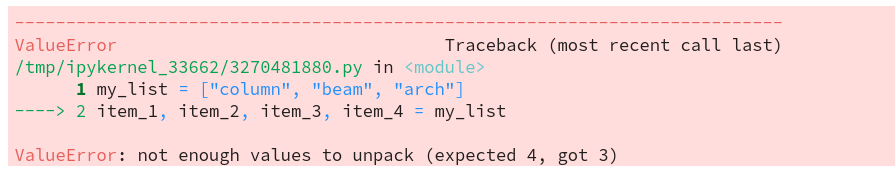

# 2. Automating the work: `for` loops

Part of the reason we are doing this Python stuff is to have the computer do our repetitive work for us. We accomplish this by putting a task into a loop and instruct the computer to repeat the loop until the work is done.

In Python, the primary tool for this is the `for` loop.

## Looping Syntax

```python
for <item_description> in <collection_of_items>:
    <the code>
    <for our task(s)>
    <goes here...>
```

A quick example:

```python
columns = ["COL450x900", "COL600x800", "COL500x600"]

column_widths = []
for column in columns:
    column_width = column[3:6]
    column_width_declaration = f"This column is {column_width} mm wide"
    column_widths.append(column_width_declaration)

print(column_widths)
```

## Understanding the loop syntax

```python
for <item> in <collection_of_items>:
```

In order to loop, we need to have something that we can loop over. That is, we need an _iterable_ of some kind. Many things in Python are _iterable_ including lists and strings (remember, a string is a collection of characters).

While we are in the loop, the loop visit each item in the collection sequentially. To refer to the current item, we give it a name. That name can be anything we want but it's best if the name relates to the name of the iterable.

In other words:

```python
for <name_given_to_the_current_item> in <my_collection_of_items>:
```

Here are some examples:

```python
multiples_3 = [3, 6, 9, 12]
for multiple in multiples_3:
    print(multiple)
```

But this also works (although what's happening is not as apparent):

```python
turkies = [3, 6, 9, 12]
for book in turkies: # book? in turkies?
    print(book)
```

## "Pythonic" looping vs. "Non-pythonic" looping

If you have experience Matlab, C, or C++, then you may be used to seeing a different kind of loop:

```python
multiples_3 = [3, 6, 9, 12]

for idx in range(len(multiples_3)): # Looping through indexes
    item = multiples_3[idx] # Using the index to access the item through indexing
    print(item)
```

In this kind of loop, you are not given the actual items in the collection. You are _generating_ integers in a sequence and using those integers to retrieve the item in the collection using indexing.

If you do this in Python, people will accuse you of being "non-pythonic". Sure, you can do it and it will work just fine.  However, you are not taking advantage of the fact that Python just gives you what you need without having to use indexing.

**But!!! What if you need the index for some reason???**

Ah! There is a pythonic solution for this: `enumerate`.

# Looping Recipes

## Transforming items in a list (or other collection)

A common application for looping is **transforming** data in a `list` or other kind of collection and putting the transformed data into a new `list`.

This is the general recipe for that:

```python
your_data = ['data1', 'data2', 'data3', ...]

acc = [] # Your "accumulator", an empty list
for <item> in <your_data>:
    new_item = <do something with item>
    acc.append(new_item)
```

And here is an example of that:

```python
column_dimensions = [[300, 600], [200, 600], [400, 400]] # l x w

column_labels = [] # The accumulator
for column_dim in column_dimensions: # Each item is a list of two numbers
    width, length = column_dim # Use unpacking to separate them into two different variables
    column_label = f"COL{width}X{length}"
    column_labels.append(column_label)
```


## Accessing data from two lists

Sometimes, you have two lists of data that are the same length and you wish to combine them in some way.

This is the general recipe for that:

```python
data_list_1 = [...]
data_list_2 = [...]

acc = [] # Accumulator
for idx, item in enumerate(data_list_1):
    other_item = data_list_2[idx]
    new_item = <do something with item and other_item>
    acc.append(new_item)
```

And here is an example of that:

```python
column_widths = [300, 300, 300, 400, 400, 400]
column_lengths = [400, 600, 900, 400, 600, 800]

column_sizes = []
for idx, width in enumerate(column_widths): # Iterate over column widths; get the idx with enumerate
    length = column_lengths[idx]
    column_size = f"COL{width}X{length}"
    column_sizes.append(column_size)
```



## Double loops

Sometimes, you have a _nested_ collection, collections inside of collections, and you need to access items within the inner collection.

Here is the general recipe for that:

```python
nested_data = [[...], [...], ...]

outside_acc = [] # "Outside" single accumulator
for outside_item in nested_data:
    inner_acc = [] # You may or may not need an inner accumulator
    for inside_item in outside_item:
        new_inside_item = <do something with inside item>
        inner_acc.append
    new_outside_item = inner_acc
    outside_acc.append(new_outside_item)
```

And here is an example of that:

```python
# A list of beam spans 
# Each sub list represents one beam with it's spans
# Dimensions are in strings in ft'in but we want as numbers in decimal feet
beams_with_spans = [["12'6", "4'8"], ["3'2", "6'3", "4'8"], ["20'2"]]

beam_spans_ft = [] # Outer accumulator
for beam_spans in beams_with_spans:
    beam_ft = [] # Inner accumulator
    for span in beam_spans:
        feet_as_str = span.split("'")[0]
        inches_as_str = span.split("'")[1]
        
        feet_as_num = float(feet_as_str)
        inches_as_num = float(inches_as_str)
        
        decimal_feet = feet_as_num + inches_as_num / 12
        beam_ft.append(decimal_feet)
    beam_spans_ft.append(beam_ft)
```
 
    
  
        

# Looping Recipe: Looping over lines in a file

A very common application for looping is for looping over lines in a file, both for reading a file and writing a file.

In your lesson directory, there is a file called `beam_0.txt`. Let's open the file and add the lines of the file to an accumulator.


## Reading lines in a file
```python
my_file = "beam_0.txt"
file_data = [] # Our accumulator for the data
with open(my_file, "r") as file:
    for line in file.readlines():
        file_data.append(line)
```

Now that we have the data stored in a list called `file_data`, we can look at it and manipulate it directly in Python.

```python
file_data[1:3] # Show line #s 1 and 2 (stop BEFORE 3)
```

## Writing lines in a file

Data can be written to a file if it contains a **list of string**. If you have data in your list that is not a string, you must convert it to a string using the `str()` function.

**Note: Each item in the list will be just written to the file. They will not be on new lines.**
```python
some_made_up_data = ["one big column", "one big beam", "one big footing"] # All strings
my_new_file = "new_file.txt"

with open(my_new_file, "w") as file:
    for line in some_made_up_data:
        file.write(line)
```

To add each item to a new line, either the strings in the list must end with the new line character (`\n`) or you must add a new line character:

```python
some_made_up_data = ["one big column", "one big beam", 42, ["footing one", 2.1]] # Mixed data
my_new_file = "new_file.txt"

with open(my_new_file, "w") as file:
    for line in some_made_up_data:
        line = str(line)
        line = line + "\n"
        file.write(line)
```